In [7]:
import pandas as pd

data = pd.read_csv('data/customer_booking.csv', encoding="ISO-8859-1")

In [8]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


## Data Pre Processing

There are no null values, but we need to keep only relevant details to predict a customer booking

In [9]:
data["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [10]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
data["flight_day"] = data["flight_day"].map(mapping)
data["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [11]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [16]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [17]:
x = data.drop("booking_complete", axis=1)
y = data["booking_complete"]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=18)

In [19]:
x.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52


In [15]:
data[data['booking_complete'] == 1]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
82,1,Internet,RoundTrip,15,31,17,1,AKLKUL,Malaysia,0,0,0,8.83,1
86,1,Internet,RoundTrip,156,19,14,1,AKLKUL,Malaysia,1,0,0,8.83,1
94,1,Internet,RoundTrip,181,87,2,2,AKLKUL,Singapore,1,0,1,8.83,1
109,1,Mobile,RoundTrip,127,17,16,2,AKLKUL,Malaysia,1,0,1,8.83,1
122,1,Internet,RoundTrip,42,17,14,2,AKLKUL,Malaysia,0,0,0,8.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,1,Internet,RoundTrip,33,6,6,3,PENTPE,Taiwan,1,1,0,4.67,1
49977,2,Internet,RoundTrip,15,6,16,2,PENTPE,Malaysia,1,1,1,4.67,1
49980,4,Internet,RoundTrip,242,6,9,2,PENXIY,Malaysia,1,0,1,5.00,1
49984,2,Internet,RoundTrip,7,6,4,3,PERPNH,Australia,0,0,0,5.62,1


Let's convert the categorical variables such as sales channel, trip type, route, booking_origin to a usable format

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
def finetune_return_mae(x_train, x_test, y_train, y_test):
    finetuned_model = RandomForestRegressor(n_estimators=100, random_state=18)
    finetuned_model.fit(x_train, y_train)
    y_predicted_values = finetuned_model.predict(x_test)
    mae = mean_absolute_error(y_test, y_predicted_values)
    return mae

In [21]:
columns_with_missing_values = []
for column in x_train.columns:
    if x_train[column].isnull().any():
        columns_with_missing_values.append(column)
x_train.drop(columns_with_missing_values, axis=1, inplace=True)
x_test.drop(columns_with_missing_values, axis=1, inplace=True)

In [22]:
# cardinality means number of unique values in a column
low_cardinality_columns = []
for column in x_train.columns:
    if x_train[column].nunique() < 10 and x_train[column].dtype == "object":
        low_cardinality_columns.append(column)
# adds columns with unique number values less than 10

In [23]:
numerical_columns = []
for column in x_train.columns:
    if x_train[column].dtype in ['float64', 'int64']:
        numerical_columns.append(column)

In [24]:
# combine only these two types of data in our data
data = low_cardinality_columns + numerical_columns
x_train = x_train[data].copy()
x_test = x_test[data].copy()

In [25]:
x_train.head()

,sales_channel,trip_type,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
20469,Internet,RoundTrip,1,34,89,5,4,1,1,1,8.83
36519,Internet,RoundTrip,2,65,5,5,6,1,0,1,5.52
292,Internet,RoundTrip,2,9,44,8,5,1,0,1,8.83
7360,Internet,RoundTrip,2,7,34,23,1,1,0,0,8.58
29734,Internet,RoundTrip,1,74,4,7,5,0,0,1,8.58


In [26]:
# Get the list of these categorical variables
categorical_variables_names = (x_train.dtypes == 'object') # selects the other data type
categorical_variables_names = list(categorical_variables_names[categorical_variables_names].index)
categorical_variables_names

['sales_channel', 'trip_type']

## Approach 1: Drop Columns

In [27]:
x_train_drop_categorical_columns = x_train.select_dtypes(exclude=['object'])
x_test_drop_categorical_columns = x_test.select_dtypes(exclude=['object'])
print("Approach 1: Dropping these categorical columns")
finetune_return_mae(x_train_drop_categorical_columns, x_test_drop_categorical_columns, y_train, y_test)

Approach 1: Dropping these categorical columns


0.24612372380952383

## Approach 2: Ordinal Encoding

In [28]:
from sklearn.preprocessing import OrdinalEncoder

OE_x_train = x_train.copy()
OE_x_test = x_test.copy()
OE = OrdinalEncoder()

OE_x_train[categorical_variables_names] = OE.fit_transform(OE_x_train[categorical_variables_names])
OE_x_test[categorical_variables_names] = OE.transform(OE_x_test[categorical_variables_names])

print("Approach 2: Ordinal Encoding")
finetune_return_mae(OE_x_train, OE_x_test, y_train, y_test)

Approach 2: Ordinal Encoding


0.24548505357142858

This is a very slight improvement from removing the columns

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

booking_predictor = RandomForestRegressor(n_estimators=100, random_state=18)
booking_predictor.fit(OE_x_train, y_train)

y_booking_prediction = booking_predictor.predict(OE_x_test)
r2_score = r2_score(y_test, y_booking_prediction)
print("Our Random Forest Regressor Model R2 Score: ", r2_score)

Our Random Forest Regressor Model R2 Score:  -0.004505107080302384


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

booking_predictor = RandomForestRegressor(n_estimators=100, random_state=18)
booking_predictor.fit(x_train_drop_categorical_columns, y_train)

y_booking_prediction = booking_predictor.predict(x_test_drop_categorical_columns)
r2_score = r2_score(y_test, y_booking_prediction)
print("Our Random Forest Regressor Model R2 Score: ", r2_score)

Our Random Forest Regressor Model R2 Score:  -0.014650545125198589


In [39]:
from sklearn.model_selection import cross_val_score

MAE_scores = -1 * cross_val_score(booking_predictor, x[x[categorical_variables_names]==False], y, cv=5, scoring="neg_mean_absolute_error")
print("Mean Absolute Error:\n", MAE_scores)
# to compare the models, we use negative mae score as the cross_val_score prioritises a high score, and by using neg MAE we are consistent

Mean Absolute Error:
 [0.2318775  0.23936771 0.24991582 0.26769256 0.28735144]


In [40]:
print(f"Average MAE Score {MAE_scores.mean()}")


Average MAE Score 0.25524100469000005


In [41]:
def get_score(n_estimators):
    predictor = RandomForestRegressor(n_estimators=n_estimators, random_state=18)
    scores = -1 * cross_val_score(predictor, x[x[categorical_variables_names]==False], y, cv=3, scoring='neg_mean_absolute_error')
    return scores.mean()


In [42]:
results = {}
for n_estimator in range (50,450,50):
    results.update({n_estimator: get_score(n_estimator)})

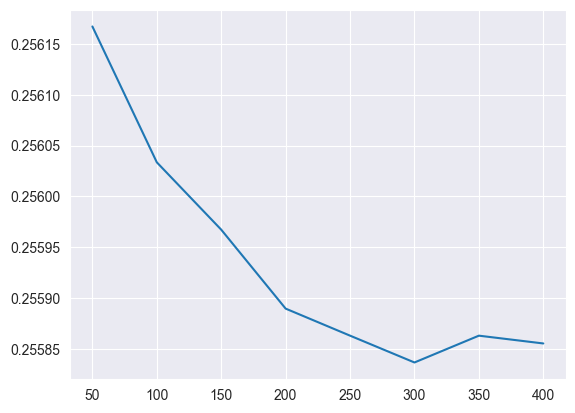

In [43]:
import matplotlib.pyplot as plt

plt.plot(list(results.keys()), list(results.values()))
plt.show()

Optimum value of n_estimators is 300

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

booking_predictor = RandomForestRegressor(n_estimators=300, random_state=18)
booking_predictor.fit(x_train_drop_categorical_columns, y_train)
y_booking_prediction = booking_predictor.predict(x_test_drop_categorical_columns)
r2_score = r2_score(y_test, y_booking_prediction)
print("Our Random Forest Regressor Model R2 Score: ", r2_score)

Our Random Forest Regressor Model R2 Score:  -0.008314871696035064


# Now fit with all data

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

booking_predictor = RandomForestRegressor(n_estimators=300, random_state=18)
booking_predictor.fit(x[x[categorical_variables_names]==False], y)

RandomForestRegressor(n_estimators=300, random_state=18)

In [49]:
from sklearn.model_selection import cross_val_score

MAE_scores = -1 * cross_val_score(booking_predictor, x[x[categorical_variables_names]==False], y, cv=5, scoring="neg_mean_absolute_error")
print("Mean Absolute Error:\n", MAE_scores)

Mean Absolute Error:
 [0.23188942 0.23930398 0.24975865 0.26747662 0.2871619 ]


In [50]:
print(f"Average MAE Score {MAE_scores.mean()}")

Average MAE Score 0.2551181137766666
